In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
sell=pd.read_csv("sell.csv")

In [3]:
buy= pd.read_csv("buy.csv")

In [4]:
sell=sell.iloc[:,0:11]

In [5]:
buy=buy.iloc[:,0:11]

In [6]:
buy.replace(0,np.nan,inplace=True)

In [7]:
sell.replace(0,np.nan,inplace=True)


In [8]:
print(sell['S_P1'].max())
print(sell['S_P2'].max())
print(sell['S_P3'].max())
print(sell['S_P4'].max())
print(sell['S_P5'].max())
#print(sell['S_P6'].max())
#print(sell['S_P7'].max())
#print(sell['S_P8'].max())
#print(sell['S_P9'].max())
#print(sell['S_P10'].max())

99999.0
99999.0
99999.0
99999.0
130.0


In [9]:
sell=sell[sell['S_P1']!=99999.0]
sell=sell[sell['S_P2']!=99999.0]
sell=sell[sell['S_P3']!=99999.0]
sell=sell[sell['S_P4']!=99999.0]

In [10]:
print(sell['S_P1'].max())
print(sell['S_P2'].max())
print(sell['S_P3'].max())
print(sell['S_P4'].max())
print(sell['S_P5'].max())
#print(sell['S_P6'].max())
#print(sell['S_P7'].max())
#print(sell['S_P8'].max())
#print(sell['S_P9'].max())
#print(sell['S_P10'].max())

180.88
130.0
125.0
130.0
130.0


In [11]:
print(buy['B_P1'].min())
print(buy['B_P2'].min())
print(buy['B_P3'].min())
print(buy['B_P4'].min())
print(buy['B_P5'].min())
#print(buy['B_P6'].min())
#print(buy['B_P7'].min())
#print(buy['B_P8'].min())
#print(buy['B_P9'].min())
#print(buy['B_P10'].min())

0.005
0.005
0.005
0.005
0.005


In [12]:
buy=buy[buy['B_P1']!=0.005]
buy=buy[buy['B_P2']!=0.005]
buy=buy[buy['B_P3']!=0.005]
buy=buy[buy['B_P4']!=0.005]
buy=buy[buy['B_P5']!=0.005]
#buy=buy[buy['B_P9']!=1.0]
#buy=buy[buy['B_P10']!=1.0]

In [13]:
print(buy['B_P1'].min())
print(buy['B_P2'].min())
print(buy['B_P3'].min())
print(buy['B_P4'].min())
print(buy['B_P5'].min())
#print(buy['B_P6'].min())
#print(buy['B_P7'].min())
#print(buy['B_P8'].min())
#print(buy['B_P9'].min())
#print(buy['B_P10'].min())

0.01
0.01
58.11
0.01
57.93


In [14]:
buy=buy[buy['B_P1']!=0.01]
buy=buy[buy['B_P2']!=0.01]
buy=buy[buy['B_P4']!=0.01]

In [15]:
print(buy['B_P1'].min())
print(buy['B_P2'].min())
print(buy['B_P4'].min())


1.0
78.78
57.96


In [16]:
buy=buy[buy['B_P1']!=1.0]

In [17]:
print(buy['B_P1'].min())

3.0


In [18]:
buy=buy[buy['B_P1']!=3.0]

In [19]:
print(buy['B_P1'].min())

10.32


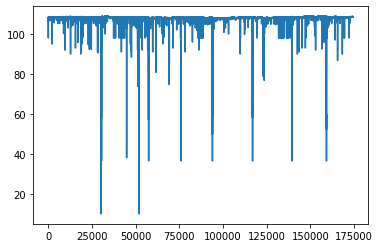

In [20]:
plt.plot(buy['B_P1'])

In [21]:
buy[buy['B_P1']==10.32]

,Time,B_P1,B_V1,B_P2,B_V2,B_P3,B_V3,B_P4,B_V4,B_P5,B_V5
52045,2019/11/08 14:06:43.711,10.32,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
buy=buy[buy['B_P1']!=10.32]

In [23]:
print(buy['B_P1'].min())

10.39


In [24]:
buy=buy[buy['B_P1']!=10.39]

In [25]:
print(buy['B_P1'].min())

36.7


In [26]:
c=sell.columns

In [27]:
p=np.array([])
for i in range(0,len(c)):
    if i%2==1:
        p=np.append(p,c[i])

In [28]:
v=np.array([])
for i in range(1,len(c)):
    if i%2==0:
        v=np.append(v,c[i])

In [29]:
sp=sell.loc[:,p]

In [30]:
sv=sell.loc[:,v]

In [31]:
w=buy.columns

In [32]:
p=np.array([])
for i in range(0,len(w)):
    if i%2==1:
        p=np.append(p,w[i])

In [33]:
v=np.array([])
for i in range(1,len(w)):
    if i%2==0:
        v=np.append(v,w[i])

In [34]:
bp=buy.loc[:,p]

In [35]:
bv=buy.loc[:,v]

In [36]:
bp.fillna(axis=1,method='ffill',inplace=True)

In [37]:
sp.fillna(axis=1,method='ffill',inplace=True)

In [38]:
sv=sv.T.fillna(sv.T.mean()).T

In [39]:
bv=bv.T.fillna(bv.T.mean()).T

In [40]:
bv['Time']=buy['Time']

In [41]:
bp['Time']=buy['Time']

In [42]:
sv['Time']=sell['Time']

In [43]:
sp['Time']=sell['Time']

In [44]:
bv.set_index('Time',inplace=True)
bp.set_index('Time',inplace=True)
sv.set_index('Time',inplace=True)
sp.set_index('Time',inplace=True)

In [45]:
bv = bv.loc[~bv.index.duplicated(keep='first')]
bp = bp.loc[~bp.index.duplicated(keep='first')]
sv = sv.loc[~sv.index.duplicated(keep='first')]
sp = sp.loc[~sp.index.duplicated(keep='first')]

In [46]:
bb = pd.concat([bp, bv], axis=1)
ss = pd.concat([sp, sv], axis=1)

In [47]:
data=pd.concat([bb, ss], axis=1, sort=True)

In [48]:
data1=data.dropna()

In [49]:
data=data.fillna(axis=0,method='bfill').fillna(axis=0,method='ffill')

In [50]:
data['Price']=(data['S_P1']+data['B_P1'])/2

In [51]:
data1['Price']=(data1['S_P1']+data1['B_P1'])/2

In [52]:
def labeling(frame,alpha,horizon):
    data=frame['Price']
    v=np.array([])
    for i in range(horizon,len(data)-horizon):
        m1=data[i-horizon:i].mean()
        m2=data[i:i+horizon].mean()
        m=(m2-m1)/m1
        v=np.append(v,m)
    l1=np.where(v>alpha,1,0)
    l2=np.where(v<-alpha,-1,0)
    l=pd.Series(l1+l2)
    
    j=pd.Series(np.zeros(frame.shape[0]-len(l))).replace(0,np.nan)
    l=l.append(j,ignore_index=True)
    h=l.shift(horizon)
    h.name='Label'
    frame["Time"]=frame.index
    frame.reset_index(drop=True,inplace=True)
    y=pd.concat([frame, h], axis=1,ignore_index=False)
    y.set_index('Time',inplace=True)
    y=y.dropna()
    return y

In [53]:
def labeling1(frame,alpha,horizon):
    data=frame['Price']
    v=np.array([])
    for i in range(len(data)-horizon):
        m1=data[i]
        m2=data[i:i+horizon].mean()
        m=(m2-m1)/m1
        v=np.append(v,m)
    l1=np.where(v>alpha,1,0)
    l2=np.where(v<-alpha,-1,0)
    l=pd.Series(l1+l2)
    

    frame["Time"]=frame.index
    frame.reset_index(drop=True,inplace=True)
    l.name='Label'
    y=pd.concat([frame, l], axis=1,ignore_index=False)
    y.set_index('Time',inplace=True)
    y=y.dropna()
    return y

In [54]:
def labeling2(frame,alpha,horizon):
    data=frame['Price']
    v=np.array([])
    for i in range(len(data)-horizon):
        m1=data[i]
        m2=data[i-horizon:i].mean()
        m=(m1-m2)/m2
        v=np.append(v,m)
    l1=np.where(v>alpha,1,0)
    l2=np.where(v<-alpha,-1,0)
    l=pd.Series(l1+l2)
    

    j=pd.Series(np.zeros(frame.shape[0]-len(l))).replace(0,np.nan)
    l=l.append(j,ignore_index=True)
    h=l.shift(horizon)
    h.name='Label'
    frame["Time"]=frame.index
    frame.reset_index(drop=True,inplace=True)
    y=pd.concat([frame, h], axis=1,ignore_index=False)
    y.set_index('Time',inplace=True)
    y=y.dropna()
    return y

In [56]:
def labeling3(frame,alpha,horizon):
    data=frame['Price']
    v=np.array([])
    for i in range(horizon,len(data)):
        m1=data[i]
        m2=data[i-horizon]
        m=(m1-m2)/m2
        v=np.append(v,m)
    l1=np.where(v>alpha,1,0)
    l2=np.where(v<-alpha,-1,0)
    l=pd.Series(l1+l2)
    

    j=pd.Series(np.zeros(frame.shape[0]-len(l))).replace(0,np.nan)
    l=l.append(j,ignore_index=True)
    h=l.shift(horizon)
    h.name='Label'
    frame["Time"]=frame.index
    frame.reset_index(drop=True,inplace=True)
    y=pd.concat([frame, h], axis=1,ignore_index=False)
    y.set_index('Time',inplace=True)
    y=y.dropna()
    return y

In [128]:
fff=labeling(data,0.0001,50)

In [136]:
ggg=labeling3(data1,0.0001,1)

In [64]:
kkk=labeling3(data1,0.0001,5)

In [137]:
ggg

,B_P1,B_P2,B_P3,B_P4,B_P5,B_V1,B_V2,B_V3,B_V4,B_V5,...,S_P3,S_P4,S_P5,S_V1,S_V2,S_V3,S_V4,S_V5,Price,Label
Time,,,,,,,,,,,,,,,,,,,,,
1,108.25,108.25,108.25,108.25,108.25,2400.0,2200.0,1600.0,2100.0,1900.0,...,108.25,108.25,108.25,200.0,400.0,300.0,100.0,100.0,108.250,0.0
2,108.02,107.88,107.88,107.88,107.88,500.0,2200.0,1350.0,1350.0,1350.0,...,108.29,108.29,108.29,500.0,500.0,500.0,500.0,500.0,108.155,-1.0
3,108.18,108.18,108.18,108.18,108.18,200.0,200.0,200.0,200.0,200.0,...,108.31,108.31,108.31,200.0,200.0,200.0,200.0,200.0,108.245,1.0
4,108.22,108.22,108.22,108.22,108.22,100.0,100.0,100.0,100.0,100.0,...,108.28,108.28,108.28,100.0,100.0,100.0,100.0,100.0,108.250,0.0
5,108.26,108.26,108.26,108.26,108.26,100.0,100.0,100.0,100.0,100.0,...,108.26,108.26,108.26,100.0,100.0,100.0,100.0,100.0,108.260,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43956,108.66,108.66,108.66,108.66,108.66,100.0,100.0,100.0,100.0,100.0,...,109.03,109.03,109.03,100.0,100.0,100.0,100.0,100.0,108.845,1.0
43957,108.64,108.64,108.64,108.64,108.64,100.0,100.0,100.0,100.0,100.0,...,108.75,108.75,108.75,100.0,100.0,100.0,100.0,100.0,108.695,-1.0
43958,108.66,108.66,108.66,108.66,108.66,100.0,100.0,100.0,100.0,100.0,...,108.69,108.69,108.69,100.0,100.0,100.0,100.0,100.0,108.675,-1.0


In [88]:
ggg.to_csv('Order_Book.csv') 

In [140]:
fff.to_csv('Order_Book1.csv') 

In [71]:
kkk.to_csv('Book.csv')

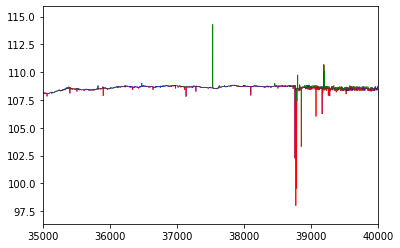

In [70]:
y=kkk["Price"]#.values[200000:]
x=np.linspace(1, len(y), len(y))

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

c=kkk['Label']#[200000:]
c=list(c.replace(0,'b').replace(-1,'r').replace(1,'g'))
lc = LineCollection(segments, colors=c, linewidths=1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
ax.set_xlim(35000, 40000)
plt.show()


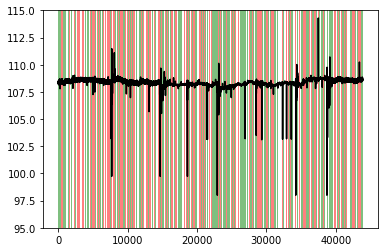

In [114]:
fig, ax = plt.subplots()
y=ggg["Price"].values
x=np.linspace(1, len(y), len(y))
ax.plot(x, y, color='black')

# use data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = ggg['Label']
ax.fill_between(x, 0, 120, where=theta==1,
                facecolor='green', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 120, where=theta==-1,
                facecolor='red', alpha=0.5, transform=trans)

#ax.set_xlim(38500, 39000)
ax.set_ylim(95, 115)

plt.show()

(array([12761.,     0.,     0.,     0.,     0., 18134.,     0.,     0.,
            0., 13061.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

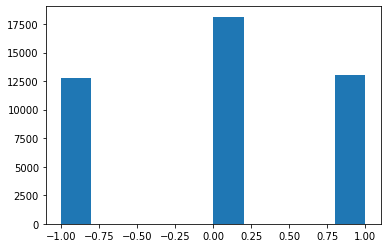

In [69]:
plt.hist(kkk['Label'])